In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
house_pred=pd.read_csv('chennai_house_price_prediction.csv')

In [6]:
house_pred.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [7]:
house_pred.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
house_pred.shape

(7109, 19)

In [9]:
house_pred.drop_duplicates().shape

(7109, 19)

In [10]:
house_pred.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [11]:
house_pred.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P01778,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [12]:
house_pred['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [13]:
house_pred['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [14]:
house_pred['N_BATHROOM'].mode()

0    1.0
dtype: float64

In [15]:
house_pred['N_BATHROOM'].fillna(house_pred['N_BATHROOM'].mode()[0],inplace=True)

In [16]:
house_pred['N_BEDROOM'].fillna(house_pred['N_BEDROOM'].mode()[0],inplace=True)

In [17]:
house_pred.loc[house_pred['N_BATHROOM'].isnull()]==True

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE


In [18]:
for i in range(0,len(house_pred)):
    if pd.isnull(house_pred['N_BATHROOM'][i])==True:
        if house_pred['N_BEDROOM'][i]==1.0:
            house_pred['N_BATHROOM'][i]==1.0
        else:
            house_pred['N_BATHROOM'][i]==2.0

In [19]:
house_pred[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [20]:
QS_ALL=(house_pred['QS_ROOMS'] + house_pred['QS_BATHROOM'] + house_pred['QS_BEDROOM'])/3

In [21]:
pd.concat([house_pred['QS_ROOMS'],house_pred['QS_BATHROOM'],house_pred['QS_BEDROOM'],QS_ALL],axis=1).head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000


In [22]:
def value(x):
    return((x['QS_ROOMS']+x['QS_BATHROOM']+x['QS_BEDROOM'])/3)

In [23]:
house_pred['QS_OVERALL']=house_pred.apply(lambda x: value(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'],axis=1)

In [24]:
house_pred.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [25]:
temp=['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print(i,':')
    
    print(house_pred[i].value_counts())
    

AREA :
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64
N_BEDROOM :
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64
N_BATHROOM :
1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64
N_ROOM :
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64
SALE_COND :
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64
PARK_FACIL :
Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64
BUILDTYPE :
House         2444
Commercial    2325
Others        2310
Other           26
Comercial  

In [30]:
house_pred['AREA'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar','Adyr':'Adyar','Ann Nagar':'Anna Nagar','Karapakam':'Karapakkam'},inplace=True)

In [31]:
house_pred['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [32]:
house_pred['SALE_COND'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'},inplace=True)

In [33]:
house_pred['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [35]:
house_pred['PARK_FACIL'].replace({'Noo':'No'},inplace=True)

In [36]:
house_pred['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [37]:
house_pred['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)

In [38]:
house_pred['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [39]:
house_pred['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)

In [40]:
house_pred['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [41]:
house_pred['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

In [42]:
house_pred['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [46]:
house_pred.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

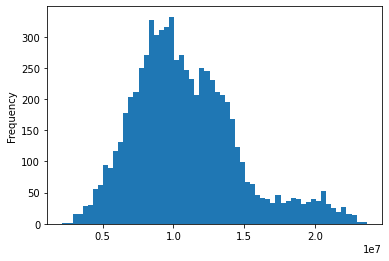

In [53]:
house_pred['SALES_PRICE'].plot.hist(bins=60)

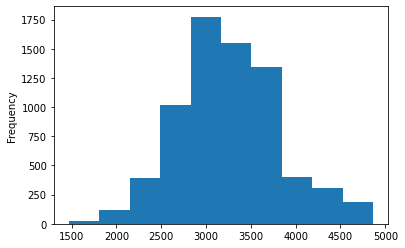

In [60]:
(np.sqrt(house_pred['SALES_PRICE'])).plot.hist()

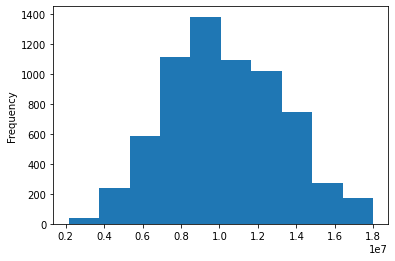

In [63]:
house_pred[house_pred['SALES_PRICE']<18000000]['SALES_PRICE'].plot.hist()

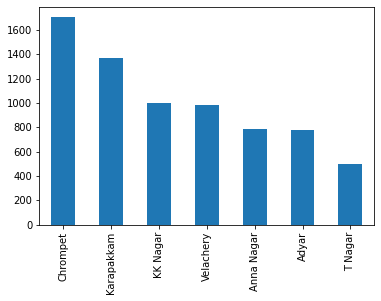

In [66]:
house_pred['AREA'].value_counts().plot(kind='bar')

In [71]:
house_pred

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330000,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765000,304049,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090000,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010000,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290000,74063,7406250
5,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320000,198316,12394750
6,Chrompet,1167,137,1.0,1.0,3,Partial,No,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.670000,33955,8488790
7,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260000,235204,16800250
8,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550000,33236,8308970
9,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160000,121255,8083650


In [70]:
house_pred.drop(['PRT_ID'],axis=1,inplace=True)

In [73]:
house_pred=pd.get_dummies(house_pred)
house_pred

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330000,144400,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765000,304049,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090000,92114,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010000,77042,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290000,74063,...,0,1,0,0,0,1,0,0,0,0
5,1220,36,2.0,1.0,4,4.5,2.6,3.1,3.320000,198316,...,0,0,1,0,0,0,0,1,0,0
6,1167,137,1.0,1.0,3,3.6,2.1,2.5,2.670000,33955,...,0,0,1,0,0,0,0,0,1,0
7,1847,176,3.0,2.0,5,2.4,4.5,2.1,3.260000,235204,...,0,1,0,0,0,0,0,0,0,1
8,771,175,1.0,1.0,2,2.9,3.7,4.0,3.550000,33236,...,1,0,0,1,0,0,0,0,0,1
9,1635,74,2.0,1.0,4,3.1,3.1,3.3,3.160000,121255,...,0,0,1,0,0,0,1,0,0,0


In [77]:
x=house_pred.drop('SALES_PRICE',axis=1)
y=house_pred['SALES_PRICE']


In [78]:
from sklearn.model_selection import train_test_split

In [80]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=2)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((4976, 40), (4976,), (2133, 40), (2133,))

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [82]:
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
train_predict=lr.predict(train_x)
test_predict=lr.predict(test_x)

In [84]:
train_score=np.sqrt(mean_squared_log_error(train_y,train_predict))
train_score

0.09082295389283748

In [85]:
test_score=np.sqrt(mean_squared_log_error(test_y,test_predict))
test_score

0.09470675213177657